## FDNY Fire Incident Dispatch Data Homework

##### DATA 602 Noah Collin
10/22/2022

data here:
    https://data.cityofnewyork.us/Public-Safety/Fire-Incident-Dispatch-Data/8m42-w767/data

assignment prompt here: https://github.com/data602sps/datasetspractice/blob/main/07_assignment.ipynb

For this assignment, I've used the FDNY incidents dataset which catalogs 8M+ incidents since 2005.  I left the notebook in the loose order I had to explore the dataset myself.  If this were more of a "production" notebook, I'd delete a lot of these calls and reorder them and possibly chain them all into one big function to call at the start a la <i>Effecitve Pandas</i> by Matt Harrison.

### Dependencies

In [1]:
import pandas as pd
import re
try:
    from tqdm.auto import tqdm
    #progress bars
except:
    print("Couldn't import tqdm...")
import matplotlib.pyplot as plt
try:
    from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
except:
    print ("sklearn not on this machine...")
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
try:
    import tabulate
except:
    print("did not import tabulate")

#Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 53). O'Reilly Media. Kindle Edition. 

C:\Users\Noah\.conda\envs\NLTK etal\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%matplotlib inline  

### Read Data

In [3]:
fileName = "Fire_Incident_Dispatch_Data.csv"

In [4]:
df = pd.read_csv(fileName)

In [5]:
print("There are {:,} rows and {} columns in the dataframe.".format(df.shape[0], df.shape[1]) )

There are 8,691,513 rows and 29 columns in the dataframe.


<i>The CSV file is actually 2+ Gb.  That's why I won't be uploading it to github along with this notebook.<p>If you're intrested in reproducing the notebook, download the CSV file from the link above.</i>

# EDA

In [6]:
df.head(3)

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,2785,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,...,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y,397,357,1,1,0
1,5.001331e+14,01/01/2005 12:00:03 AM,BRONX,3307,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,...,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y,260,250,1,0,0
2,5.001036e+14,01/01/2005 12:01:02 AM,BROOKLYN,363,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,...,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y,146,139,1,0,0


In [7]:
#columns:
[i for i in df.columns]

['STARFIRE_INCIDENT_ID',
 'INCIDENT_DATETIME',
 'ALARM_BOX_BOROUGH',
 'ALARM_BOX_NUMBER',
 'ALARM_BOX_LOCATION',
 'INCIDENT_BOROUGH',
 'ZIPCODE',
 'POLICEPRECINCT',
 'CITYCOUNCILDISTRICT',
 'COMMUNITYDISTRICT',
 'COMMUNITYSCHOOLDISTRICT',
 'CONGRESSIONALDISTRICT',
 'ALARM_SOURCE_DESCRIPTION_TX',
 'ALARM_LEVEL_INDEX_DESCRIPTION',
 'HIGHEST_ALARM_LEVEL',
 'INCIDENT_CLASSIFICATION',
 'INCIDENT_CLASSIFICATION_GROUP',
 'DISPATCH_RESPONSE_SECONDS_QY',
 'FIRST_ASSIGNMENT_DATETIME',
 'FIRST_ACTIVATION_DATETIME',
 'FIRST_ON_SCENE_DATETIME',
 'INCIDENT_CLOSE_DATETIME',
 'VALID_DISPATCH_RSPNS_TIME_INDC',
 'VALID_INCIDENT_RSPNS_TIME_INDC',
 'INCIDENT_RESPONSE_SECONDS_QY',
 'INCIDENT_TRAVEL_TM_SECONDS_QY',
 'ENGINES_ASSIGNED_QUANTITY',
 'LADDERS_ASSIGNED_QUANTITY',
 'OTHER_UNITS_ASSIGNED_QUANTITY']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8691513 entries, 0 to 8691512
Data columns (total 29 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   STARFIRE_INCIDENT_ID            float64
 1   INCIDENT_DATETIME               object 
 2   ALARM_BOX_BOROUGH               object 
 3   ALARM_BOX_NUMBER                int64  
 4   ALARM_BOX_LOCATION              object 
 5   INCIDENT_BOROUGH                object 
 6   ZIPCODE                         float64
 7   POLICEPRECINCT                  float64
 8   CITYCOUNCILDISTRICT             float64
 9   COMMUNITYDISTRICT               float64
 10  COMMUNITYSCHOOLDISTRICT         float64
 11  CONGRESSIONALDISTRICT           float64
 12  ALARM_SOURCE_DESCRIPTION_TX     object 
 13  ALARM_LEVEL_INDEX_DESCRIPTION   object 
 14  HIGHEST_ALARM_LEVEL             object 
 15  INCIDENT_CLASSIFICATION         object 
 16  INCIDENT_CLASSIFICATION_GROUP   object 
 17  DISPATCH_RESPONSE_SECONDS_Q

At the outset, its observable that there will be a few columns to fix... We'll change the datetime columns to the datetime data type and make some other columns catergorical...

In [9]:
df.describe().head(3)

,STARFIRE_INCIDENT_ID,ALARM_BOX_NUMBER,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
count,8.691493e+06,8.691513e+06,8.172032e+06,8.172510e+06,8.170964e+06,8.172442e+06,8.170145e+06,8.170964e+06,8.691513e+06,8.691513e+06,8.691513e+06,8.691513e+06,8.691513e+06,8.691513e+06
mean,1.328740e+15,2.856997e+03,1.073400e+04,6.223091e+01,2.325822e+01,2.631381e+02,1.487955e+01,1.050962e+01,3.863419e+01,2.639873e+02,2.319706e+02,1.297417e+00,7.209877e-01,3.723070e-01
std,4.790946e+14,2.405297e+03,5.566140e+02,3.515800e+01,1.536177e+01,1.212123e+02,9.837665e+00,3.257633e+00,3.058465e+02,3.153842e+02,2.189927e+02,1.052139e+00,9.066588e-01,9.196099e-01


#### The above describe method call is pretty usless with scientific notation.  This makes everything a 2 decimal point float:

In [10]:
# "fixed" describe call:
pd.options.display.float_format = "{:.2f}".format #changes float format for the notebook...
df.describe()

,STARFIRE_INCIDENT_ID,ALARM_BOX_NUMBER,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
count,8691493.00,8691513.00,8172032.00,8172510.00,8170964.00,8172442.00,8170145.00,8170964.00,8691513.00,8691513.00,8691513.00,8691513.00,8691513.00,8691513.00
mean,1328739626730346.25,2857.00,10734.00,62.23,23.26,263.14,14.88,10.51,38.63,263.99,231.97,1.30,0.72,0.37
std,479094632607413.56,2405.30,556.61,35.16,15.36,121.21,9.84,3.26,305.85,315.38,218.99,1.05,0.91,0.92
min,52371067014.00,10.00,10000.00,1.00,1.00,101.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,917614420110289.00,1031.00,10040.00,33.00,9.00,112.00,6.00,8.00,8.00,188.00,162.00,1.00,0.00,0.00
50%,1332506060110799.00,2214.00,10472.00,62.00,21.00,302.00,14.00,11.00,16.00,259.00,228.00,1.00,0.00,0.00
75%,1727084550110200.00,3737.00,11226.00,94.00,37.00,318.00,24.00,13.00,45.00,332.00,296.00,1.00,1.00,1.00
max,2121398940150490.00,9999.00,12345.00,123.00,51.00,595.00,32.00,16.00,405447.00,309686.00,260429.00,164.00,134.00,151.00


There are obvioulsy a number of extreme outliers here.  The INCIDENT_TRAVEL_TM_SECONDS_QY 75% quartile is 296 but the max value is 260,429 seconds (which is 72+ hours).  The ladders, engines, and other unites assinged all have 75% quartiles of 1 but max values of 134, 164, or 151 respectively.
It might seem mathmatically sensible to filter some extreme datapoints out of our analysis, but were it not for the <a href ="https://en.wikipedia.org/wiki/Great_Chicago_Fire"> Great Chicago Fire </a> of 1871, we might not have fire modern fire departments.  I suppose we'll leave these extreme fires in our analysis.  Perhaps we'll do just a larger incidents filtering at the end of the dataset.

##### Correlation:

In [11]:
corr = df.corr()
corr['ENGINES_ASSIGNED_QUANTITY'].sort_values(ascending = False )

ENGINES_ASSIGNED_QUANTITY        1.00
OTHER_UNITS_ASSIGNED_QUANTITY    0.71
LADDERS_ASSIGNED_QUANTITY        0.69
ALARM_BOX_NUMBER                 0.05
ZIPCODE                          0.02
COMMUNITYSCHOOLDISTRICT          0.02
POLICEPRECINCT                   0.01
COMMUNITYDISTRICT                0.01
CITYCOUNCILDISTRICT              0.01
DISPATCH_RESPONSE_SECONDS_QY     0.01
CONGRESSIONALDISTRICT           -0.02
INCIDENT_RESPONSE_SECONDS_QY    -0.03
STARFIRE_INCIDENT_ID            -0.05
INCIDENT_TRAVEL_TM_SECONDS_QY   -0.07
Name: ENGINES_ASSIGNED_QUANTITY, dtype: float64

In [12]:
df.LADDERS_ASSIGNED_QUANTITY.value_counts().sort_index().head()
#ladders assigned is one proxy for an incident's itensity, to my knowledge anyway

0    4549593
1    2288703
2    1669794
3     136190
4      30698
Name: LADDERS_ASSIGNED_QUANTITY, dtype: int64

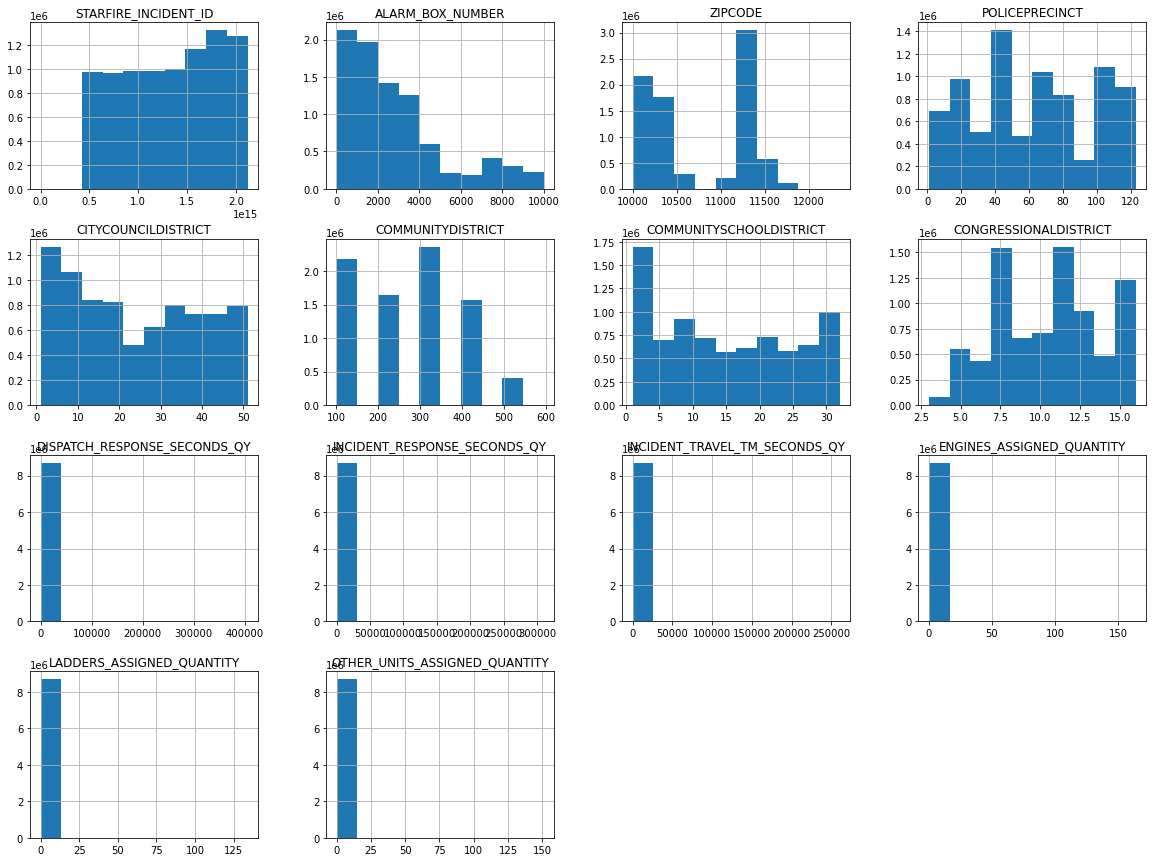

In [13]:
df.hist( figsize=(20,15)) ; # I recall reading somehwere the semicolon gets rid of unwanted text

Many of these plots are not particularly informative, some are outright useless.  The['ENGINES_ASSIGNED_QUANTITY'] column, for example looks like one plot.  Next, I'll filter it before plotting so that we can see there must be some extraneous data...

In [14]:
print("{}% of rows have an 'ENGINES_ASSIGNED_QUANTITY' of six or less.".format( 
((len(df[df['ENGINES_ASSIGNED_QUANTITY']<=6]) / len(df) ) * 100) ) )

99.8596907120774% of rows have an 'ENGINES_ASSIGNED_QUANTITY' of six or less.


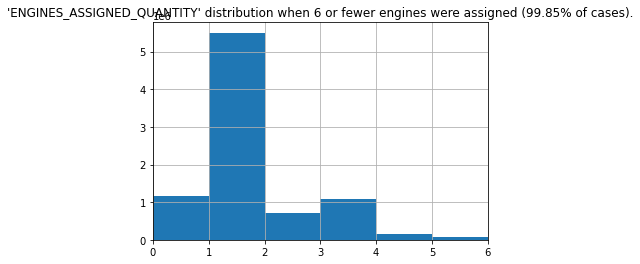

In [15]:
df[df['ENGINES_ASSIGNED_QUANTITY']<=6]['ENGINES_ASSIGNED_QUANTITY'].hist(bins = 6)
plt.xlim(0,6)
plt.title("'ENGINES_ASSIGNED_QUANTITY' distribution when 6 or fewer engines were assigned (99.85% of cases).") ;

Mostly <b>one</b> engine was assinged per incident, followed closely by zero, two, or three engines.

In [16]:
statsCats = ['LADDERS_ASSIGNED_QUANTITY', 'ENGINES_ASSIGNED_QUANTITY',
             'DISPATCH_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY']
means = [df[i].mean() for i in statsCats]
medians = [df[i].median() for i in statsCats]
modes = [df[i].value_counts().index[0] for i in statsCats]

statsdf = pd.DataFrame({"Column": statsCats, "mean": means, "median": medians, "mode":modes})
statsdf
# Summary statistics means, medians,

,Column,mean,median,mode
0,LADDERS_ASSIGNED_QUANTITY,0.72,0.00,0
1,ENGINES_ASSIGNED_QUANTITY,1.30,1.00,1
2,DISPATCH_RESPONSE_SECONDS_QY,38.63,16.00,6
3,INCIDENT_TRAVEL_TM_SECONDS_QY,231.97,228.00,0


array([[<AxesSubplot:xlabel='LADDERS_ASSIGNED_QUANTITY', ylabel='LADDERS_ASSIGNED_QUANTITY'>,
        <AxesSubplot:xlabel='ENGINES_ASSIGNED_QUANTITY', ylabel='LADDERS_ASSIGNED_QUANTITY'>,
        <AxesSubplot:xlabel='DISPATCH_RESPONSE_SECONDS_QY', ylabel='LADDERS_ASSIGNED_QUANTITY'>,
        <AxesSubplot:xlabel='INCIDENT_TRAVEL_TM_SECONDS_QY', ylabel='LADDERS_ASSIGNED_QUANTITY'>],
       [<AxesSubplot:xlabel='LADDERS_ASSIGNED_QUANTITY', ylabel='ENGINES_ASSIGNED_QUANTITY'>,
        <AxesSubplot:xlabel='ENGINES_ASSIGNED_QUANTITY', ylabel='ENGINES_ASSIGNED_QUANTITY'>,
        <AxesSubplot:xlabel='DISPATCH_RESPONSE_SECONDS_QY', ylabel='ENGINES_ASSIGNED_QUANTITY'>,
        <AxesSubplot:xlabel='INCIDENT_TRAVEL_TM_SECONDS_QY', ylabel='ENGINES_ASSIGNED_QUANTITY'>],
       [<AxesSubplot:xlabel='LADDERS_ASSIGNED_QUANTITY', ylabel='DISPATCH_RESPONSE_SECONDS_QY'>,
        <AxesSubplot:xlabel='ENGINES_ASSIGNED_QUANTITY', ylabel='DISPATCH_RESPONSE_SECONDS_QY'>,
        <AxesSubplot:xlabel='DISPATCH_

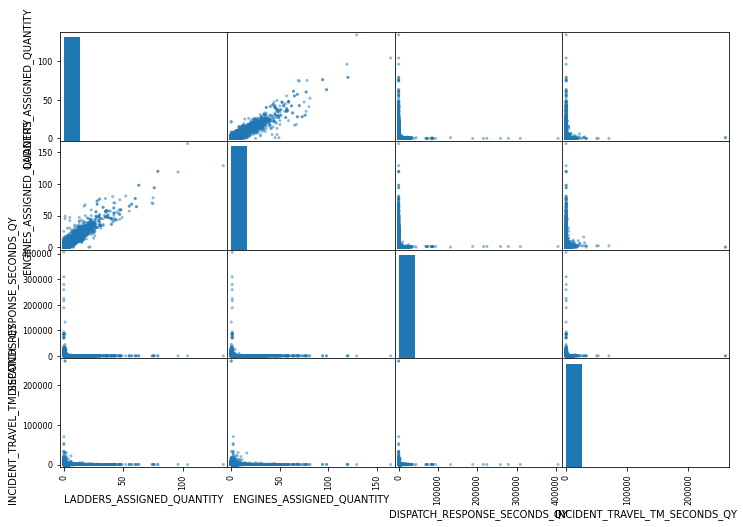

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[statsCats], figsize = (12, 8)) ;
#This takes ~30 minutes to run...

These graphs shows a lot of outliers.  We might want to filter to address that.

### NA values, as a percentage

In [18]:
df.isna().sum().sort_values(ascending = False) / len(df) *100 #percentage
#These are the percentage of missing values

FIRST_ON_SCENE_DATETIME          14.05
COMMUNITYSCHOOLDISTRICT           6.00
CONGRESSIONALDISTRICT             5.99
CITYCOUNCILDISTRICT               5.99
ZIPCODE                           5.98
COMMUNITYDISTRICT                 5.97
POLICEPRECINCT                    5.97
FIRST_ACTIVATION_DATETIME         0.82
FIRST_ASSIGNMENT_DATETIME         0.54
ALARM_BOX_LOCATION                0.00
STARFIRE_INCIDENT_ID              0.00
INCIDENT_TRAVEL_TM_SECONDS_QY     0.00
ENGINES_ASSIGNED_QUANTITY         0.00
INCIDENT_RESPONSE_SECONDS_QY      0.00
VALID_INCIDENT_RSPNS_TIME_INDC    0.00
VALID_DISPATCH_RSPNS_TIME_INDC    0.00
INCIDENT_CLOSE_DATETIME           0.00
LADDERS_ASSIGNED_QUANTITY         0.00
HIGHEST_ALARM_LEVEL               0.00
DISPATCH_RESPONSE_SECONDS_QY      0.00
INCIDENT_CLASSIFICATION_GROUP     0.00
INCIDENT_CLASSIFICATION           0.00
INCIDENT_DATETIME                 0.00
ALARM_LEVEL_INDEX_DESCRIPTION     0.00
ALARM_SOURCE_DESCRIPTION_TX       0.00
INCIDENT_BOROUGH         

##### drop some columns
FIRST_ON_SCENE_DATETIME is missing 14+% of values
Several columns describe the location in more granularity.  It might be interesting to 
somehow combine them but for today we'll just drop them

In [19]:
df = df.drop(["FIRST_ON_SCENE_DATETIME", "COMMUNITYSCHOOLDISTRICT", "CONGRESSIONALDISTRICT", 
             "CITYCOUNCILDISTRICT", "POLICEPRECINCT"], axis=1)
df.columns
# Drop column(s) from your dataset. ✓

Index(['STARFIRE_INCIDENT_ID', 'INCIDENT_DATETIME', 'ALARM_BOX_BOROUGH',
       'ALARM_BOX_NUMBER', 'ALARM_BOX_LOCATION', 'INCIDENT_BOROUGH', 'ZIPCODE',
       'COMMUNITYDISTRICT', 'ALARM_SOURCE_DESCRIPTION_TX',
       'ALARM_LEVEL_INDEX_DESCRIPTION', 'HIGHEST_ALARM_LEVEL',
       'INCIDENT_CLASSIFICATION', 'INCIDENT_CLASSIFICATION_GROUP',
       'DISPATCH_RESPONSE_SECONDS_QY', 'FIRST_ASSIGNMENT_DATETIME',
       'FIRST_ACTIVATION_DATETIME', 'INCIDENT_CLOSE_DATETIME',
       'VALID_DISPATCH_RSPNS_TIME_INDC', 'VALID_INCIDENT_RSPNS_TIME_INDC',
       'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'ENGINES_ASSIGNED_QUANTITY', 'LADDERS_ASSIGNED_QUANTITY',
       'OTHER_UNITS_ASSIGNED_QUANTITY'],
      dtype='object')

### stratified sample of the data
Sample the data to make it more manageable.<p>
<i>'INCIDENT_BOROUGH'</i> works because there are no nulls and its broad enough that a sample should still be represntative...

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.93, random_state=42)
for train_index, test_index in split.split(df, df['INCIDENT_BOROUGH']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
#Inspiration taken from: 
#Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 55). O'Reilly Media. Kindle Edition. 

I'm aware that this <i>StratifiedShuffleSplit</i> function is supposed to be used to work on the train set for machine learning...
Here, I'm using it to cut down on the data size (to run on my laptop).  Later, the following cleaning could be ran over the entire dataset.

In [21]:
print("The length of the original (df) dataset:\t{:,}".format(len(df)) )
print("The length of the strat_train_set dataset:\t{:,}".format(len(strat_train_set)) )
print("The length of the strat_test_set dataset:\t{:,}".format(len(strat_test_set)) )

The length of the original (df) dataset:	8,691,513
The length of the strat_train_set dataset:	608,405
The length of the strat_test_set dataset:	8,083,108


As mentioned, I'm going to work with the much more manageable 608,405 row dataset for now...

### Fixing Data Types

#### Change datetime to datetime

In [22]:
#### this cell, converting a column to datetime on 8,691,513 rows, took about ~45 minutes to run... I don't know why when the following one is basically instant
#df['INCIDENT_DATETIME'] = \
#tqdm( pd.to_datetime( df['INCIDENT_DATETIME']) )

In [23]:
strat_train_set = strat_train_set.assign(
    INCIDENT_DATETIME = pd.to_datetime( strat_train_set["INCIDENT_DATETIME"]),
    INCIDENT_CLOSE_DATETIME = pd.to_datetime( strat_train_set["INCIDENT_CLOSE_DATETIME"])
)

strat_train_set[["INCIDENT_CLOSE_DATETIME", "INCIDENT_DATETIME"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608405 entries, 6065265 to 6657806
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   INCIDENT_CLOSE_DATETIME  608405 non-null  datetime64[ns]
 1   INCIDENT_DATETIME        608405 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 13.9 MB


Ensure datetimes changed by making some plots...

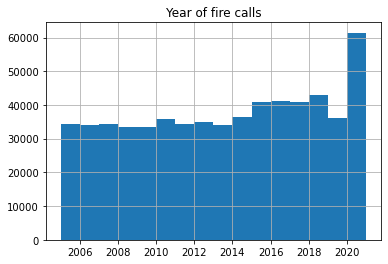

In [24]:
strat_train_set['year'] = strat_train_set["INCIDENT_DATETIME"].apply(lambda x : x.year  )
# Create new columns based on existing columns or calculations. ✓
strat_train_set['year'].hist(bins = (2021-2005)) 
plt.title("Year of fire calls") ;

There was seemingly a pretty big uptick in incidents in 2021...

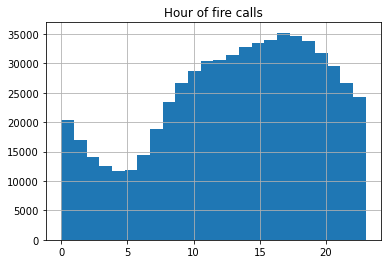

In [25]:
strat_train_set['hour'] = strat_train_set["INCIDENT_DATETIME"].apply(lambda x : x.hour  ) #creat hour column
strat_train_set['hour'].hist(bins = 24) 
plt.title("Hour of fire calls") ;

It seems to me, a non-expert layperson, that most calls are made around 5-7 p.m., possibly around the rush hour commute home and the dinner-cooking time.  I think it's sensible that there aren't a lot of calls at 4 a.m., but I'm surprised to see much fewer calls at 9 a.m. than 5 p.m. 

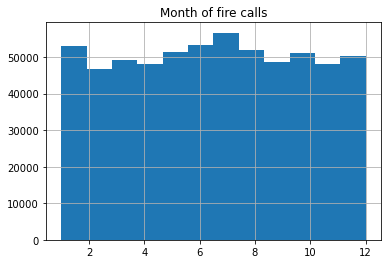

In [26]:
strat_train_set['month'] = strat_train_set["INCIDENT_DATETIME"].apply(lambda x : x.month  )
strat_train_set['month'].hist(bins = 12) 
plt.title("Month of fire calls") ;

The amount of calls for a given month is pretty uniform.

#### Convert several columns to categories
fill nas and cast as category type in chained assign call

In [27]:
#can only run this cell once...
strat_train_set = strat_train_set.assign(
    INCIDENT_BOROUGH = strat_train_set.INCIDENT_BOROUGH.fillna("unknown").astype("category"),
    ZIPCODE = strat_train_set.ZIPCODE.fillna("unknown").astype("category"),
    HIGHEST_ALARM_LEVEL = strat_train_set.HIGHEST_ALARM_LEVEL.fillna("unknown").astype("category"),
    ALARM_LEVEL_INDEX_DESCRIPTION = strat_train_set.ALARM_LEVEL_INDEX_DESCRIPTION.fillna("unknown").astype("category"),
    INCIDENT_CLASSIFICATION = strat_train_set.INCIDENT_CLASSIFICATION.fillna("unknown").astype("category")
)#.astype(...)
# Fix missing and invalid values in data. ✓
#Look at the structure of your data – are any variables improperly coded? Such as strings or characters? 
#  Convert to correct structure if needed. ✓

In [28]:
strat_train_set[['HIGHEST_ALARM_LEVEL',
                 'ZIPCODE',
                 'INCIDENT_BOROUGH',
                 "ALARM_LEVEL_INDEX_DESCRIPTION",
                "INCIDENT_CLASSIFICATION"]].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608405 entries, 6065265 to 6657806
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   HIGHEST_ALARM_LEVEL            608405 non-null  category
 1   ZIPCODE                        608405 non-null  category
 2   INCIDENT_BOROUGH               608405 non-null  category
 3   ALARM_LEVEL_INDEX_DESCRIPTION  608405 non-null  category
 4   INCIDENT_CLASSIFICATION        608405 non-null  category
dtypes: category(5)
memory usage: 8.1 MB


### Groupby

In [29]:
byBorough = strat_train_set.groupby("INCIDENT_BOROUGH")

In [30]:
# Group your dataset by one column, and get the mean, min, and max values by group.✓
byBorough.min()

C:\Users\Noah\AppData\Local\Temp\ipykernel_20032\3064142162.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  byBorough.min()


,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,COMMUNITYDISTRICT,ALARM_SOURCE_DESCRIPTION_TX,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,year,hour,month
INCIDENT_BOROUGH,,,,,,,,,,,,,,,,,,,
BRONX,151302252012.00,2005-01-01 02:00:27,BRONX,2103,201.00,911,Medical Emergencies,0,2005-01-01 02:02:10,N,N,0,0,0,0,0,2005,0,1
BROOKLYN,52371067014.00,2005-01-01 00:20:22,BROOKLYN,14,301.00,911,Medical Emergencies,0,2005-01-01 00:34:18,N,N,0,0,0,0,0,2005,0,1
MANHATTAN,52381525011.00,2005-01-01 00:01:54,MANHATTAN,10,101.00,911,Medical Emergencies,0,2005-01-01 00:23:37,N,N,0,0,0,0,0,2005,0,1
QUEENS,52375356015.00,2005-01-01 00:39:41,QUEENS,24,108.00,911,Medical Emergencies,0,2005-01-01 00:59:23,N,N,0,0,0,0,0,2005,0,1
RICHMOND / STATEN ISLAND,143093889013.00,2005-01-01 03:11:48,RICHMOND / STATEN ISLAND,14,501.00,911,Medical Emergencies,0,2005-01-01 03:29:24,N,N,0,0,0,0,0,2005,0,1


In [31]:
byBorough['ENGINES_ASSIGNED_QUANTITY'].median()

INCIDENT_BOROUGH
BRONX                      1.00
BROOKLYN                   1.00
MANHATTAN                  1.00
QUEENS                     1.00
RICHMOND / STATEN ISLAND   1.00
Name: ENGINES_ASSIGNED_QUANTITY, dtype: float64

In [32]:
byBorough['ENGINES_ASSIGNED_QUANTITY'].max()

INCIDENT_BOROUGH
BRONX                       35
BROOKLYN                    31
MANHATTAN                   94
QUEENS                      44
RICHMOND / STATEN ISLAND    80
Name: ENGINES_ASSIGNED_QUANTITY, dtype: int64

I'm surpised to see the 2nd highest "Engines Assinged" was in Staten Island with 80...

### Larger incidents (filtering)
Let's filter the original dataframe for just incdents that required two or more engines, which is suprisingly above the IQR.

In [33]:
largerIncidents = df[df.ENGINES_ASSIGNED_QUANTITY >=2]
#Filter your data based on some condition. ✓

In [34]:
print("{}% of incidents requried two or more engines.".format(\
                                    round(len(largerIncidents) / len(df) *100, 2) ) )

23.38% of incidents requried two or more engines.


In [35]:
largerIncidents.describe()

,STARFIRE_INCIDENT_ID,ALARM_BOX_NUMBER,ZIPCODE,COMMUNITYDISTRICT,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
count,2032407.00,2032414.00,1857863.00,1858085.00,2032414.00,2032414.00,2032414.00,2032414.00,2032414.00,2032414.00
mean,1293580853328784.25,3132.62,10727.67,259.64,42.38,275.22,233.52,2.84,2.00,1.32
std,469344783867755.25,2660.08,555.48,119.67,52.54,173.07,164.99,1.07,0.78,1.44
min,52381625014.00,10.00,10000.00,101.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,905860320200209.50,1075.00,10039.00,112.00,15.00,209.00,173.00,2.00,2.00,1.00
50%,1318032840150532.00,2310.00,10472.00,301.00,37.00,258.00,216.00,3.00,2.00,1.00
75%,1706857715200705.00,4173.00,11226.00,317.00,58.00,317.00,270.00,3.00,2.00,1.00
max,2121398700150240.00,9999.00,12345.00,595.00,25401.00,70039.00,70030.00,164.00,134.00,151.00


#### Upper() and lower() calls... ✓

In [36]:
largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'] = \
largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'].copy().apply(lambda x : x.upper())

largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'].head(3)

C:\Users\Noah\AppData\Local\Temp\ipykernel_20032\1896627691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'] = \


3     DEFAULT RECORD
12     INITIAL ALARM
13    DEFAULT RECORD
Name: ALARM_LEVEL_INDEX_DESCRIPTION, dtype: object

In [37]:
largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'] = \
largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'].copy().apply(lambda x : x.lower())

largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'].head(3)
# Convert all the string values to upper or lower cases in one column. ✓

C:\Users\Noah\AppData\Local\Temp\ipykernel_20032\1668920220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largerIncidents['ALARM_LEVEL_INDEX_DESCRIPTION'] = \


3     default record
12     initial alarm
13    default record
Name: ALARM_LEVEL_INDEX_DESCRIPTION, dtype: object

In [39]:
doubleGroupBy = largerIncidents.groupby(["INCIDENT_BOROUGH", "INCIDENT_CLASSIFICATION" ])
# Group your dataset by two columns and then sort the aggregated results within the groups. ✓

In [40]:
tempDF = pd.DataFrame( doubleGroupBy['ENGINES_ASSIGNED_QUANTITY'].mean() )

In [41]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(tempDF)

ENGINES_ASSIGNED_QUANTITY
INCIDENT_BOROUGH         INCIDENT_CLASSIFICATION                                                     
BRONX                    Abandoned Derelict Vehicle Fire                                         2.65
                         Alarm System - Defective                                                3.04
                         Alarm System - Other                                                    3.02
                         Alarm System - Recorded                                                 3.03
                         Alarm System - Testing                                                  2.99
                         Alarm System - Unnecessary                                              3.04
                         Alarm System - Unwarranted                                              3.05
                         Assist Civilian - Non-Medical                                           2.69
                         Automobile Fire                                                         2.51
                         Brush Fire                                                              3.08
                         Carbon Monoxide - Code 1 - Investigation                                2.42
                         Carbon Monoxide - Code 2 - Incident (1-9 ppm)                           2.39
                         Carbon Monoxide - Code 3 - Emergency (over 9 ppm)                       2.51
                         Carbon Monoxide - Code 4 - No Detector Activation                       2.62
                         Carbon Monoxide - No Code                                               2.65
                         Church Fire                                                             3.86
                         Clogged Incinerator                                                     2.25
                         Construction or Demolition Building Fire                                4.29
                         Defective Oil Burner                                                    2.88
                         Demolition Debris or Rubbish Fire                                       3.02
                         Downed Tree                                                             2.07
                         Elevator Emergency - Occupied                                           2.84
                         Elevator Emergency - Unoccupied                                         3.00
                         Factory Fire                                                            5.63
                         Hospital Fire                                                           3.25
                         Manhole Fire - Blown Cover                                              3.07
                         Manhole Fire - Extended to Building                                     3.17
                         Manhole Fire - Other                                                    3.08
                         Manhole Fire - Seeping Smoke                                            2.97
                         Maritime Emergency                                                      3.09
                         Maritime Fire                                                           2.50
                         Medical - Assist Civilian                                               2.28
                         Medical - Breathing / Ill or Sick                                       2.20
                         Medical - EMS Link 10-91                                                2.09
                         Medical - No PT Contact EMS is Onscene                                  2.06
                         Medical - PD Link 10-91                                                 2.05
                         Medical - Serious Life Threatening                                      2.05
                         Medical - Victim Deceased                                               2

The above cell admittedly prints a bit weird, but there was no other good way to print out all this data seemingly...  I tried a few methods of better printouts.
Anyway, at a glance, Factory Fires seem to utilize ~5 Engines seemingly in the Brox and Brooklyn, 4 in Manhattan, 6 in Queens and 7 in Staten Island "on average" (mean) for incidents requiring two or more engines (filtered <i>largerIncidents</i> dataframe).  Who knows if there's any insight into this observation.

## Conclusions

I do think there's a lot of interesting data to explore here.  I found the following:
<ul>
    <li>Different fires incident types do sometimes have different amounts of engines by borough. </li>
    <li>There was a sizeable uptick of incidents in 2021</li>
    <li>99.8% of incidents require one or fewer engines.</li>
    <li>Most incident calls seem to come in around 5 - 7 p.m. </li> 
    </ul>
        
        
I think a subject matter expert is needed to inreprert the data.  There were certainly terms I encountered that I wasn't familiar with.  I did want to check for incidents that started at a laower "alarm" and were upgraded, but I'm not certain given the column names that a "intial" alarm was provided.  